In [1]:
import ibm_boto3
from botocore.client import Config
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

### Have been tested 170 industrial cement samples , 123 samples treated by XS 111 , 47 samples are blank cement . * the qulity data are not real , have been changed for security reason

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fc64c72832fd4bb4acc55e7c706cc0b0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jSlWaQ63hRIXJWRxn2Y-FMQ9jd78_KkQzC8u9zyBgsHG',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fc64c72832fd4bb4acc55e7c706cc0b0.get_object(Bucket='ik-donotdelete-pr-fbdrd7m6jjx2ca',Key='Copy of 28D.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,N,date,Blain,2D,28D,Steam curing,"CaO, %",LOI,"MgO, %","SO₃, %",SFA,XS111
0,1,30.03-01.04,4002,36.3,56.0,40.0,1.03,1.01,2.77,3.58,NaN,1
1,2,02.04-03.04,3960,32.9,53.2,40.4,1.36,1.15,2.75,3.48,NaN,1
2,3,2018-04-04 00:00:00,3918,28.6,53.6,38.6,1.23,1.13,3.18,3.33,NaN,0
3,4,04.04-05.04,3918,34.1,53.7,40.2,1.19,1.26,3.21,3.16,NaN,0
4,5,05.04-06.04,3934,36.2,57.0,39.4,0.96,1.42,3.01,3.43,NaN,1


     XS 111 is a quality improver grinding aid , designed to improve cement quality especially 28 days strength

In [3]:
q_data = df_data_0

### All qulity data correlation with 28 D

In [4]:
q_data.corr()['28D'].sort_values()

LOI             -0.369423
MgO, \n%        -0.197227
SO₃, \n%        -0.141759
CaO, %          -0.095464
Blain            0.159842
XS111            0.260152
2D               0.302335
N                0.434268
Steam curing     0.476606
28D              1.000000
Name: 28D, dtype: float64

In [5]:
q_data = q_data.rename(columns={"Blain": "Blaine"})

### Linear Regression Blaine vs 28D strength

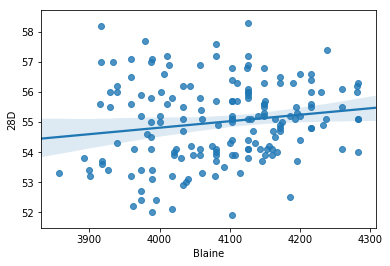

In [6]:
sns.regplot(x="Blaine", y="28D", data=q_data)

### Linear regression Blaine vs 2 D strength

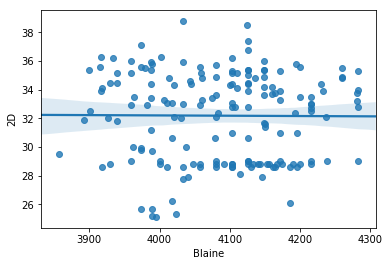

In [7]:
sns.regplot(x="Blaine", y="2D", data=q_data)

Blaine does not seem like a good predictor of this cement quality in this grinding system at all since the regression line is close to horizontal. 
The data points are very scattered and far from the fitted line, showing lots of variability. Therefore Blaine is  not a reliable predictor of quality.


### Linear model. Coefficient of determination

In [8]:
X = q_data[['Blaine']]
Y = q_data['28D']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)
print ("R^2, R-squared = ", lm.score(X, Y))

R^2, R-squared =  0.025549522887392317


Only 2,5% of 28 days fitted the regression line

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.
Blaine SSA can not be a good predictor of cement quality.

In [9]:
Yhat=lm.predict(X)
Yhat[0:5]   


array([54.81791783, 54.72749166, 54.63706548, 54.63706548, 54.67151355])

In [10]:
lm.intercept_

46.2015954544065

In [11]:
lm.coef_

array([0.002153])

In [12]:
a = lm.intercept_
b = 0.002153

In [13]:
X = 4300

In [14]:
𝑌ℎ𝑎𝑡=𝑎+𝑏*𝑋
𝑌ℎ𝑎𝑡

55.4594954544065

compressive strength = 46.20 + 0.002153*Blaine() - formula to prdict 28 d compressive strength 

   ### Pearson Correlation Blain vs 28D , P value 

In [15]:
pearson_coef, p_value = stats.pearsonr(q_data['Blaine'], q_data['28D'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print ((0.1-p_value)*1000, "% confident that the correlation between the Blain and 28D is significant")

The Pearson Correlation Coefficient is 0.15984218118942262  with a P-value of P = 0.03733176902202249
62.66823097797752 % confident that the correlation between the Blain and 28D is significant


### Pearson Correlation additive vs 28D , P value 

In [16]:
pearson_coef, p_value = stats.pearsonr(q_data['XS111'], q_data['28D'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
print ((0.1-p_value)*1000, "% confident that the correlation between QI addition and 28D is significant")

The Pearson Correlation Coefficient is 0.2601519710978522  with a P-value of P = 0.0006122535214516663
99.38774647854834 % confident that the correlation between QI addition and 28D is significant


P-value:

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is < 0.001: we say there is strong evidence that the correlation is significant. the p-value is < 0.05: there is moderate evidence that the correlation is significant. the p-value is < 0.1: there is weak evidence that the correlation is significant. the p-value is > 0.1: there is no evidence that the correlation is significant.

### Boxplot, QI XS111 contribution to 28D, 1- with XS111, 0 - Blank cement 

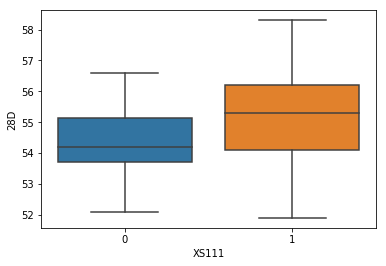

In [17]:
sns.boxplot(x="XS111", y="28D", data=q_data)

XS111 clearly demonstrated increased of compressive strength at 28 days  by 1 Mpa

### Histogram, comparison treated cement vs nontreated 

In [18]:
q_data1 = q_data[['28D','XS111']]

In [19]:
treated = q_data1[q_data1['XS111'] > 0]

In [20]:
blank = q_data1[q_data1['XS111'] < 1]

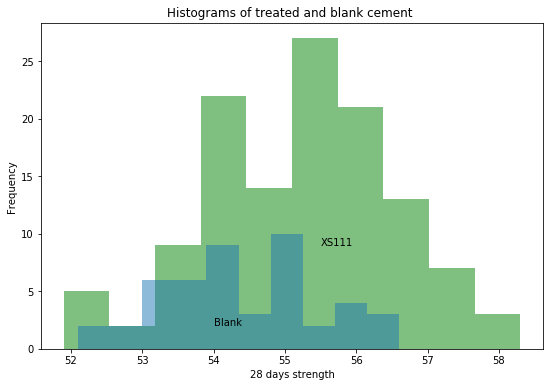

In [21]:
plt.figure(figsize =[9,6])
plt.title('Histograms of treated and blank cement ')
plt.text(54, 2, r'Blank')
plt.text(55.5, 9, r'XS111')
plt.xlabel('28 days strength')
treated['28D'].plot.hist( bins = 10,color = 'green', alpha=0.5)
blank['28D'].plot.hist(bins = 10, alpha=0.5)


XS111 clearly demonstrated increased of compressive strength at 28 days  by 1 Mpa

In [22]:
blank.head()

,28D,XS111
2,53.6,0
3,53.7,0
10,56.6,0
11,54.1,0
12,53.7,0


In [23]:
treated = treated.drop(columns = 'XS111', axis = 1)
blank = blank.drop(columns = 'XS111', axis = 1)


### Qulaity distribution 28 days sterngth of cement treated with XS 111

In [24]:
treated.describe() 







,28D
count,123.000000
mean,55.214634
std,1.350391
min,51.900000
25%,54.100000
50%,55.300000
75%,56.200000
max,58.300000


### Qulaity distribution 28 days strength of blank cement

In [25]:
blank.describe()

,28D
count,47.000000
mean,54.442553
std,1.110962
min,52.100000
25%,53.700000
50%,54.200000
75%,55.150000
max,56.600000


### Boxplot, QI XS111 correlation with Blaine

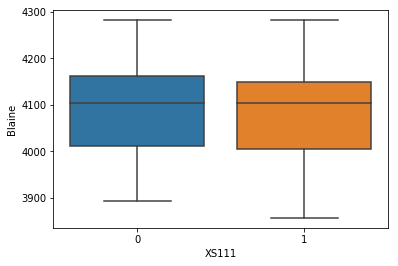

In [26]:
sns.boxplot(x="XS111", y="Blaine", data=q_data)

Blaine surface area of cement  treated with XU191 are similar to blank cement.
It means the increase is due activation of clinker by XS111 not by increase of cement  fineness.


In [27]:
data_blain = q_data[['Blaine','XS111']]

In [28]:
treated_blain = data_blain[q_data1['XS111'] > 0]

In [29]:
blank_blain = data_blain[q_data1['XS111'] < 1]

### Histogram, Blaine  distribution and XU 111 addition 

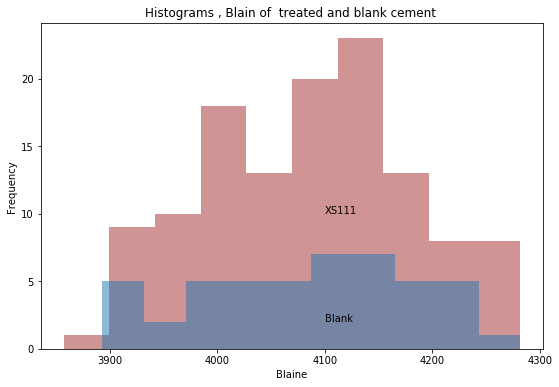

In [30]:
plt.figure(figsize =[9,6])
plt.title('Histograms , Blain of  treated and blank cement ')
plt.text(4100, 2, r'Blank')
plt.text(4100, 10, r'XS111')
plt.xlabel('Blaine')
treated_blain['Blaine'].plot.hist( bins = 10,color = 'brown', alpha=0.5)
blank_blain['Blaine'].plot.hist(bins = 10, alpha=0.5)

           there is no correlation between Blain and addition  XS111

In [31]:
treated_blain['Blaine'].describe()

count     123.000000
mean     4086.764228
std        98.455372
min      3857.000000
25%      4006.000000
50%      4103.000000
75%      4150.000000
max      4282.000000
Name: Blaine, dtype: float64

descriptive statistical analysis of  cement treated by XS 111

In [32]:
blank_blain['Blaine'].describe()

count      47.000000
mean     4088.042553
std       100.891021
min      3893.000000
25%      4012.500000
50%      4103.000000
75%      4162.500000
max      4282.000000
Name: Blaine, dtype: float64

descriptive statistical analysis of the blank  cement 